# Stoke Prediction Dataset 

Data source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset <br>
Data updated date: 2021-01-26

In [1]:
# import libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# make notebook full width for better viewing

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df = pd.read_csv(r'data/stroke.csv')

In [4]:
# read the first 5 lines of data

df.head().T

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,male,female,male,female,female
age,67.0,61.0,80.0,49.0,79.0
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,1,1,1,1,1
work_type,private,self-employed,private,private,self-employed
residence_type,urban,rural,rural,urban,rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,28.893237,32.5,34.4,24.0


In [5]:
print('Number of rows: ', df.shape[0], '\nNumber of columns: ', df.shape[1])
print('Number of \'id\' in this data:', df.id.nunique())

# row count is the same as unique id count, so setting id as index
df = df.set_index('id')

Number of rows:  5110 
Number of columns:  12
Number of 'id' in this data: 5110


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 479.1+ KB


In [7]:
df.describe()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,0.656164,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,0.475034,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,1.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,1.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Metadescription

| Feature | Data type | Other descriptions | Processing Needed? | Missing Value? | Encoding Needed? |
| ------- | --------- | ------------------ | ----------------- | --------------- | ---------------- |
gender | categorical | Female, Male, Other | T | T (Other) | T |
age | float64 | | F | F | F |
hypertension | int | 0, 1 | T | F | F |
heart_disease | int | 0, 1| T | F | F |
ever_married | int | 0, 1 | T | F | F |
work_type | categorical | Private, Self-employed, children, Govt_job, Never_worked | T | F | T |
residence_type | categorical | Rural, Urban | T | F | T |
avg_glucose_level | float64 | | F | F | F |
bmi | float64 | | F | T (replaced with mean) | F |
smoking_status | categorical | never smoked, unknown, formerly smoked, smokes | T | T (unknown) | T |
stroke | boolean | 0, 1 | T | F | F |

## Individual Feature EDA

In [9]:
# categorize data for EDA later
categorical = ['gender', 'work_type', 'residence_type', 'smoking_status']
boolean = ['hypertension', 'heart_disease', 'ever_married', 'stroke']
quant = ['age', 'avg_glucose_level', 'bmi']

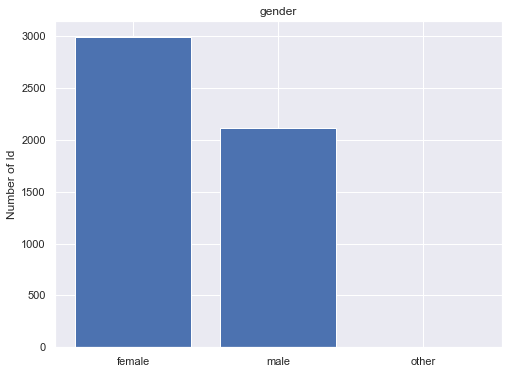

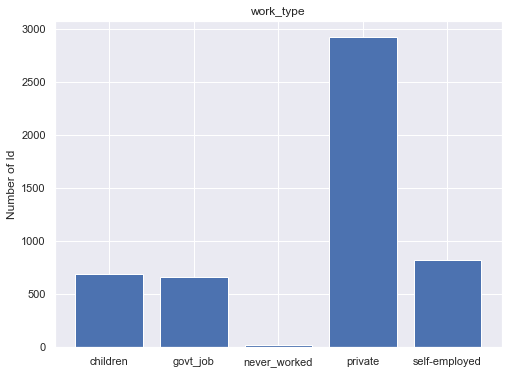

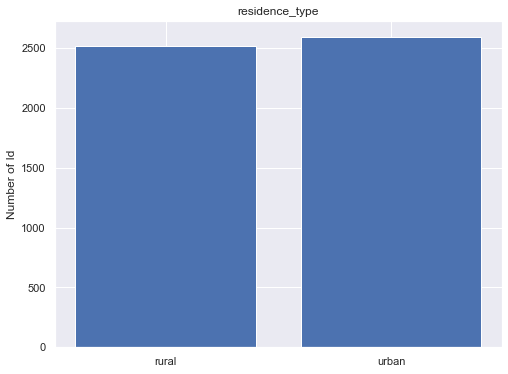

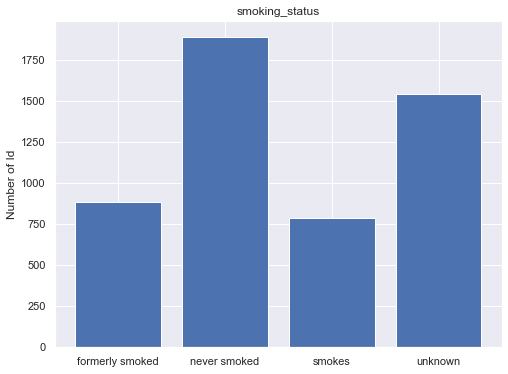

In [20]:
# using seaborn's style
sns.set()

#loop though categorical categories to create bar chart for each categories

for i in categorical:
    df_plot = df.reset_index().groupby(i).agg({'id':'count'})
    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(df_plot.index, df_plot['id'])
    ax.set_title(i)
    ax.set_ylabel('Number of Id')
    plt.show()

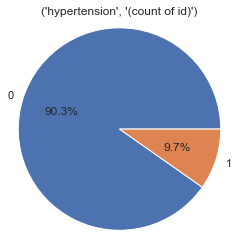

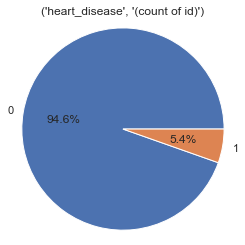

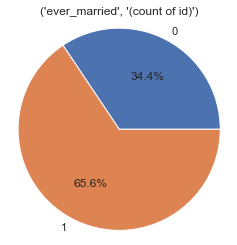

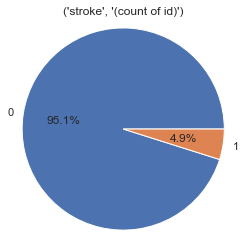

In [11]:
#loop though categorical categories to create pie chart for each boolean

for i in boolean:
    df_plot = df.reset_index().groupby(i).agg({'id':'count'})
    fig, ax = plt.subplots(figsize=(4,4))
    ax.pie(df_plot['id'], labels=df_plot.index, autopct='%1.1f%%')
    ax.set_title((i, '(count of id)'))
    ax.axis('equal')
    plt.show()

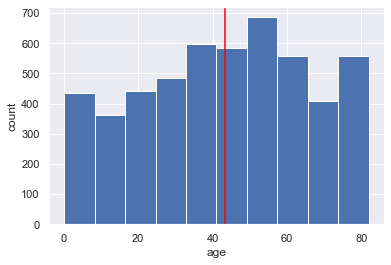

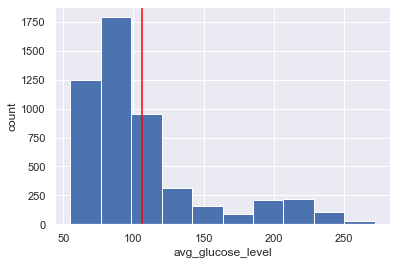

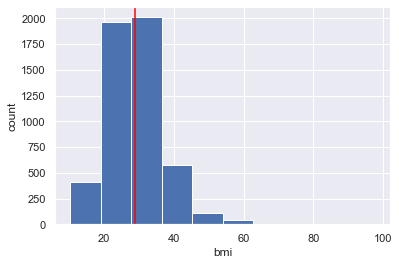

In [22]:
for i in quant:
    _ = plt.hist(df[i])
    _ = plt.xlabel(i)
    _ = plt.ylabel('count')
    plt.axvline(df[i].mean(), color='red')
    plt.show()

### Outliers

- average_glucose_level
- bmi

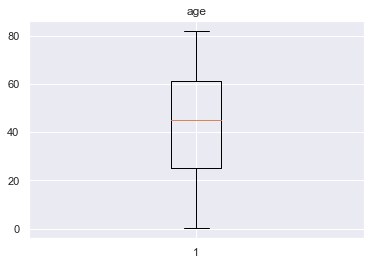

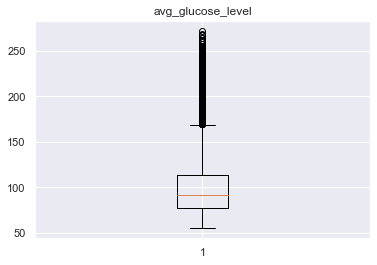

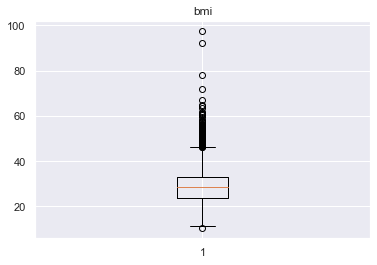

In [24]:
for i in quant:
    _ = plt.boxplot(df[i])
    plt.title(i)
    plt.show()

- avg_glucose_level <br>
    There are quite a lot of data points 1.5 standard deviation away, but none are really outliers.

- bmi <br>
    There are about 4 data points that appear to be higher than 70, this might skew out dataset. But we'll do some more exploration into the relationship between features first before deciding what to do with it.

In [35]:
# get a list of people who are outliers for bmi
df[df['bmi'] > 58].sort_values('bmi')

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
32604,male,49.0,0,0,1,self-employed,rural,215.81,58.1,never smoked,0
23047,male,43.0,0,0,1,private,urban,100.16,59.7,never smoked,0
1307,female,61.0,1,0,1,private,rural,170.05,60.2,smokes,0
72911,female,57.0,1,0,1,private,rural,129.54,60.9,smokes,0
5131,female,51.0,0,0,1,private,urban,107.72,60.9,unknown,0
65895,female,52.0,0,0,1,private,urban,98.27,61.2,unknown,0
72784,female,52.0,0,0,1,private,rural,118.46,61.6,smokes,0
20292,female,24.0,0,0,1,private,urban,85.55,63.3,never smoked,0
70670,female,27.0,0,0,1,private,rural,57.96,64.4,never smoked,0


# Feature's relationship to Stroke

Explore into the relationship of each features to stroke

In [41]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

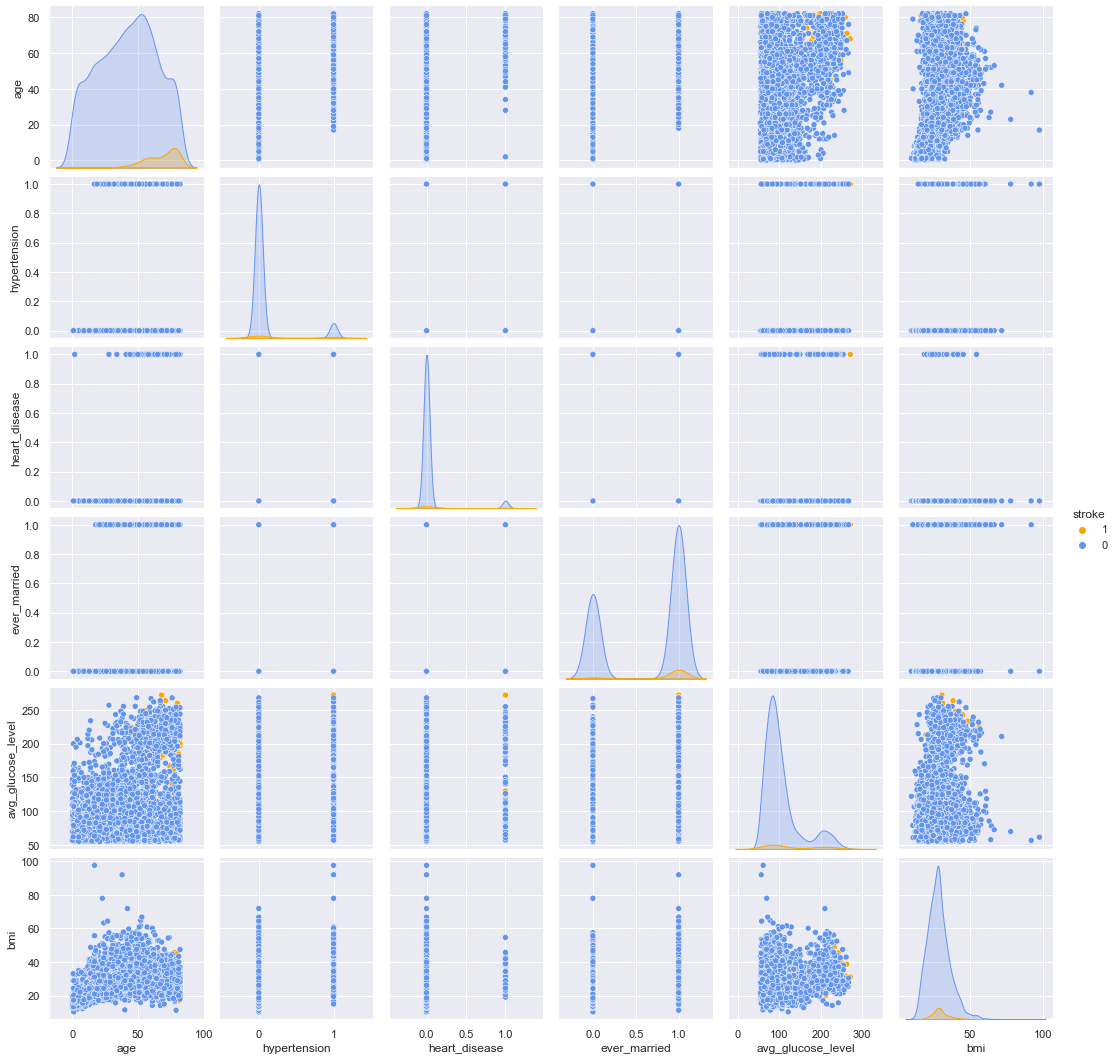

In [82]:
sns.pairplot(df, hue='stroke', hue_order=[1,0], kind='scatter', diag_kind='kde', palette={0:'cornflowerblue', 1:'orange'})

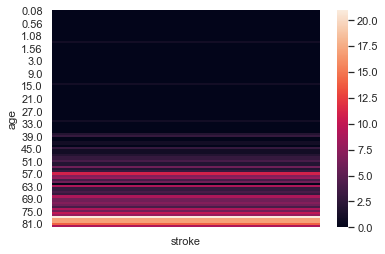

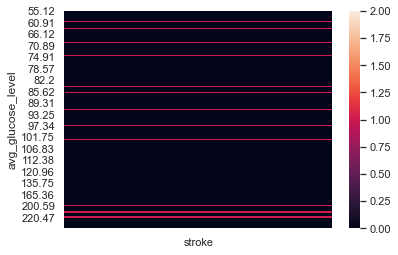

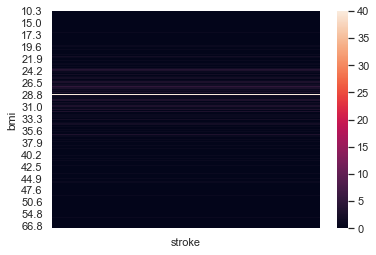

In [54]:
for i in quant:
    features = [i,'stroke']
    plot = df[features].groupby(i).agg({'stroke':sum})
    sns.heatmap(plot)
    plt.show()

In [81]:
# calculate Pearson's correlation - avg_glucose_level
corr, _ = pearsonr(df['avg_glucose_level'], df['stroke'])
print('Pearsons correlation (avg_glucose_level): %.3f' % corr)

# calculate Pearson's correlation - bmi
corr, _ = pearsonr(df['bmi'], df['stroke'])
print('Pearsons correlation (bmi): %.3f' % corr)

# age is not really continuous data
# calculate Pearson's correlation - avg_glucose_level
corr, _ = pearsonr(df['age'], df['stroke'])
print('Pearsons correlation (age): %.3f' % corr)

Pearsons correlation (avg_glucose_level): 0.132
Pearsons correlation (bmi): 0.039
Pearsons correlation (age): 0.245


For Quantitative data, it looks like age will be a stronger indicator to predict stroke with pearson correlation coefficient of 0.245 than average glucose level (0.132) and bmi (0.039). but are they statistically significant? <br>
### BMI

In [96]:
# Two Sample t-test

# Subset data
stroke = df[df['stroke'] == 1]['bmi']
no_stroke = df[df['stroke'] == 0]['bmi']

# descriptive analysis
df.groupby('stroke')['bmi'].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,28.825388,7.776203,10.3,23.6,28.300000,32.8,97.6
1,249.0,30.217789,5.825589,16.9,27.0,28.893237,32.5,56.6


In [104]:
# Does BMI data follows a normal distribution?

# generate gaussian data (normal distribution
# seed the random number generator
np.random.seed(1)
# generate univariate observations
data = 5 * np.random.random(df.shape[0]) + 50
# summarize
print('RANDOM; mean=%.3f stdv=%.3f' % (np.mean(data), np.std(data)))
print('ACTUAL: mean=%.3f stdv=%.3f' % (np.mean(df['bmi']), np.std(df['bmi'])))

RANDOM; mean=52.498 stdv=1.442
ACTUAL: mean=28.893 stdv=7.697


In [108]:
from scipy.stats import shapiro

stat, p = shapiro(stroke)
alpha = 0.05
if p > alpha:
    print('Stroke: Sample looks Gaussian (fail to reject H0)')
else:
    print('Stroke: Sample does not look Gaussian (reject H0)')
    
stat, p = shapiro(no_stroke)
if p > alpha:
    print('No_stroke: Sample looks Gaussian (fail to reject H0)')
else:
    print('No_stroke: Sample does not look Gaussian (reject H0)')

Stroke: Sample does not look Gaussian (reject H0)
No_stroke: Sample does not look Gaussian (reject H0)


In [13]:
# create functions for plotting ECDF
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

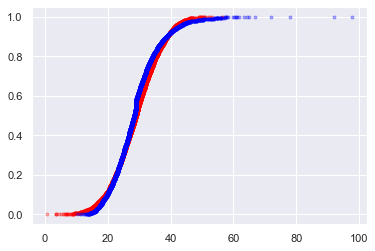

In [110]:
# Visually examine of bmi is normal

data = np.random.normal(np.mean(df['bmi']), np.std(df['bmi']), 5000)
x,y = ecdf(data)
_ = plt.plot(x,y, color='red', marker='.', linestyle='none', alpha=0.3)
x,y = ecdf(df['bmi'])
_ = plt.plot(x,y, color='blue', marker='.', linestyle='none', alpha=0.3)
plt.show()

BMI data does not follow a normal distribution.

### avg_glucose_level

In [112]:
# Two Sample t-test

# Subset data
stroke = df[df['stroke'] == 1]['avg_glucose_level']
no_stroke = df[df['stroke'] == 0]['avg_glucose_level']

# descriptive analysis
df.groupby('stroke')['avg_glucose_level'].describe()

,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,104.795513,43.846069,55.12,77.12,91.47,112.83,267.76
1,249.0,132.544739,61.921056,56.11,79.79,105.22,196.71,271.74


In [113]:
# Does BMI data follows a normal distribution?

# generate gaussian data (normal distribution
# seed the random number generator
np.random.seed(1)
# generate univariate observations
data = 5 * np.random.random(df.shape[0]) + 50
# summarize
print('RANDOM; mean=%.3f stdv=%.3f' % (np.mean(data), np.std(data)))
print('ACTUAL: mean=%.3f stdv=%.3f' % (np.mean(df['avg_glucose_level']), np.std(df['avg_glucose_level'])))

RANDOM; mean=52.498 stdv=1.442
ACTUAL: mean=106.148 stdv=45.279


In [114]:
from scipy.stats import shapiro

stat, p = shapiro(stroke)
alpha = 0.05
if p > alpha:
    print('Stroke: Sample looks Gaussian (fail to reject H0)')
else:
    print('Stroke: Sample does not look Gaussian (reject H0)')
    
stat, p = shapiro(no_stroke)
if p > alpha:
    print('No_stroke: Sample looks Gaussian (fail to reject H0)')
else:
    print('No_stroke: Sample does not look Gaussian (reject H0)')

Stroke: Sample does not look Gaussian (reject H0)
No_stroke: Sample does not look Gaussian (reject H0)


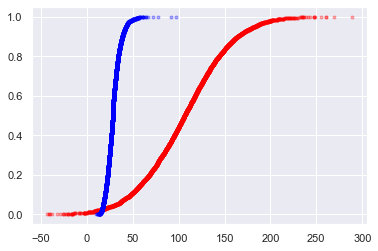

In [115]:
# Visually examine of bmi is normal

data = np.random.normal(np.mean(df['avg_glucose_level']), np.std(df['avg_glucose_level']), 5000)
x,y = ecdf(data)
_ = plt.plot(x,y, color='red', marker='.', linestyle='none', alpha=0.3)
x,y = ecdf(df['bmi'])
_ = plt.plot(x,y, color='blue', marker='.', linestyle='none', alpha=0.3)
plt.show()

avg_glucose_level data does not follow a normal distribution.

# Qualitative

In [55]:
misc = categorical + boolean

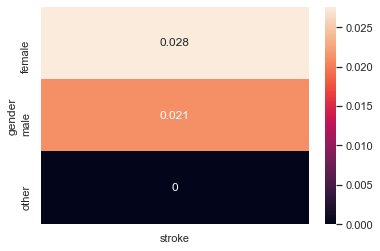

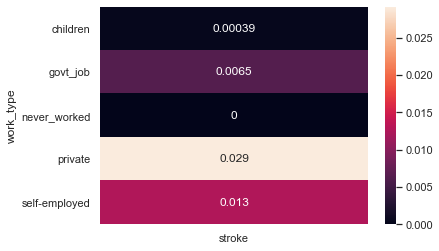

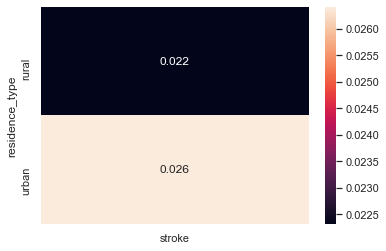

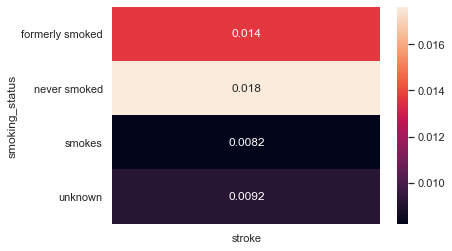

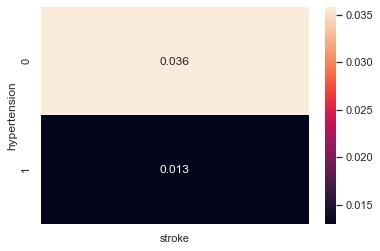

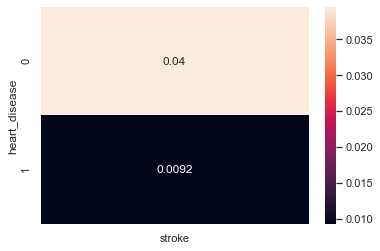

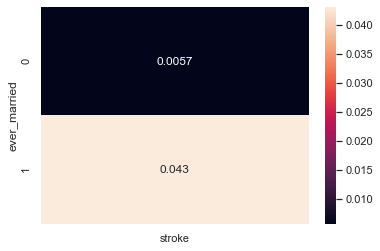

In [79]:
for i in misc[:-1]:
    def percent_total(x):
        return sum(x)/df.shape[0]
    dataframe = pd.pivot_table(df, values=['stroke'], index=i,aggfunc=({'stroke':percent_total}))
    sns.heatmap(dataframe, annot=True)
    plt.show()

# Hypothesis testing
### Chi-squared test for all categorical data:

In [95]:
for i in misc[:-1]:
    print('===========', i, '===========')
    contingency_table = pd.crosstab(df[i], df.stroke)
    stat, p, dof, expected = chi2_contingency(contingency_table)
    
    # interpret p-value
    alpha = 1.0 - prob
    if p <= alpha:
        print('\np-value: Dependent (reject H0)', round(p, 3))
    else:
        print('\np-value: Independent (fail to reject H0)', round(p, 3))
    
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        print('\nt-stats: Dependent (reject H0)', round(stat,3))
    else:
        print('\nt-stats: Independent (fail to reject H0)', round(stat,3))
    print('\n')

=========== gender ===========

p-value: Independent (fail to reject H0) 0.79

t-stats: Independent (fail to reject H0) 0.473


=========== work_type ===========

p-value: Dependent (reject H0) 0.0

t-stats: Dependent (reject H0) 49.164


=========== residence_type ===========

p-value: Independent (fail to reject H0) 0.298

t-stats: Independent (fail to reject H0) 1.082


=========== smoking_status ===========

p-value: Dependent (reject H0) 0.0

t-stats: Dependent (reject H0) 29.147


=========== hypertension ===========

p-value: Dependent (reject H0) 0.0

t-stats: Dependent (reject H0) 81.605


=========== heart_disease ===========

p-value: Dependent (reject H0) 0.0

t-stats: Dependent (reject H0) 90.26


=========== ever_married ===========

p-value: Dependent (reject H0) 0.0

t-stats: Dependent (reject H0) 58.924




For non-quantitative data, work_type, smoking_status, hypertension, heart_disease, and ever_married look like it is statistically significant that they are dependednt variables of stroke.

While the features below aren't:
- Gender
- Residence_type